#### Challenge Set 6
#### Topic: Classification
#### Date: 05/15/2016
#### Name: Anne Nguyen

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/home/amn34/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd
import numpy as np

#### Challenge 1

In [ ]:
congress = pd.read_csv('house-votes-84.data', header = None)
congress = congress.replace({'n':0,'y':1,'?':None})
congress = congress.fillna(congress.mean())
from sklearn.cross_validation import train_test_split
X = congress.loc[:,1:17]
y = congress[0]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4444)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [19]:
for model in (KNeighborsClassifier(),LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),\
              RandomForestClassifier()):
    tmp = model.fit(X_train, y_train)
    print str(tmp).split('(')[0], 'accuracy score: ', accuracy_score(y_test, tmp.predict(X_test))
    print classification_report(y_test, tmp.predict(X_test))

KNeighborsClassifier accuracy score:  0.916666666667
             precision    recall  f1-score   support

   democrat       0.93      0.93      0.93        88
 republican       0.89      0.89      0.89        56

avg / total       0.92      0.92      0.92       144

LogisticRegression accuracy score:  0.944444444444
             precision    recall  f1-score   support

   democrat       0.93      0.98      0.96        88
 republican       0.96      0.89      0.93        56

avg / total       0.95      0.94      0.94       144

GaussianNB accuracy score:  0.9375
             precision    recall  f1-score   support

   democrat       0.92      0.98      0.95        88
 republican       0.96      0.88      0.92        56

avg / total       0.94      0.94      0.94       144

SVC accuracy score:  0.951388888889
             precision    recall  f1-score   support

   democrat       0.96      0.97      0.96        88
 republican       0.95      0.93      0.94        56

avg / total       0

#### Challenge 2

In [41]:
from sklearn.metrics import roc_curve, auc

In [68]:
y_train = y_train.replace({'democrat':0, 'republican':1})

In [69]:
y_test = y_test.replace({'democrat':0, 'republican':1})

AUC for KNeighborsClassifier 0.912337662338
AUC for LogisticRegression 0.935064935065
AUC for GaussianNB 0.926136363636
AUC for SVC 0.94724025974
AUC for DecisionTreeClassifier 0.929383116883
AUC for RandomForestClassifier 0.943993506494


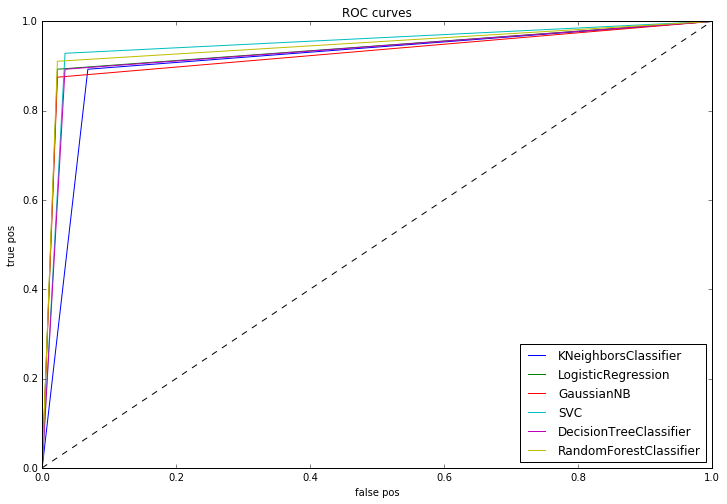

In [84]:
plt.figure(figsize=(12,8))
for model in (KNeighborsClassifier(),LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),\
              RandomForestClassifier()):
    tmp = model.fit(X_train, y_train)
    falsepos, truepos, _ = roc_curve(y_test, tmp.predict(X_test))
    plt.plot(falsepos, truepos, label = str(model).split('(')[0])
    print 'AUC for', str(model).split('(')[0], auc(falsepos, truepos)
    
plt.legend(loc='best')
plt.plot([0,1],[0,1],'--')
plt.title('ROC curves')
plt.ylabel('true pos')
plt.xlabel('false pos')

#### Challenge 3

In [61]:
from sklearn.cross_validation import cross_val_score

In [73]:
y = y.replace({'democrat':0,'republican':1})

In [75]:
for model in (KNeighborsClassifier(),LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),\
              RandomForestClassifier()):
    tmp = model.fit(X_train, y_train)
    print str(model).split('(')[0], '\n', 'accuracy:', np.mean(cross_val_score(tmp,X,y,scoring='accuracy')), '\n',\
    'precision:', np.mean(cross_val_score(tmp,X,y,scoring='precision')),'\n', 'recall:', \
    np.mean(cross_val_score(tmp,X,y,scoring='recall')),'\n', 'f1:', np.mean(cross_val_score(tmp,X,y,scoring='f1')), '\n'

KNeighborsClassifier 
accuracy: 0.933333333333 
precision: 0.892538476524 
recall: 0.940476190476 
f1: 0.915836818433 

LogisticRegression 
accuracy: 0.96091954023 
precision: 0.949398719643 
recall: 0.952380952381 
f1: 0.950059445472 

GaussianNB 
accuracy: 0.931034482759 
precision: 0.908613247223 
recall: 0.916666666667 
f1: 0.911184814591 

SVC 
accuracy: 0.954022988506 
precision: 0.922270955166 
recall: 0.964285714286 
f1: 0.942183510572 

DecisionTreeClassifier 
accuracy: 0.949425287356 
precision: 0.920949968246 
recall: 0.946428571429 
f1: 0.935752963827 

RandomForestClassifier 
accuracy: 0.965517241379 
precision: 0.942099746221 
recall: 0.97619047619 
f1: 0.94623880782 



#### Challenge 4

In [76]:
from datetime import datetime
movies = pd.read_csv('/home/amn34/metis/nyc16_ds7/challenges/challenges_data/2013_movies.csv')
my = movies.Rating
movies.ReleaseDate = pd.to_datetime(movies.ReleaseDate).apply(lambda x: x.toordinal())
mX = movies[['Budget','DomesticTotalGross','Runtime','ReleaseDate']]
mX = mX.fillna(mX.mean())
mX_train, mX_test, my_train, my_test = train_test_split(mX, my, test_size=0.33, random_state=4444)

In [77]:
mlogit = LogisticRegression().fit(mX_train,my_train)
print classification_report(my_test, mlogit.predict(mX_test))

             precision    recall  f1-score   support

          G       0.00      0.00      0.00         0
         PG       0.00      0.00      0.00         8
      PG-13       0.58      0.73      0.65        15
          R       0.54      0.70      0.61        10

avg / total       0.43      0.55      0.48        33



/home/amn34/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/amn34/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Challenge 5

In [78]:
bc = pd.read_csv('/home/amn34/metis/nyc16_ds7/challenges/challenges_data/haberman.data',header=None)
bc.columns = ['age','year','nodes','survival']

In [79]:
bc.survival = bc.survival.replace(2,0)
bcy = bc.survival
bcX = bc.drop('survival', axis=1)
bcX_train, bcX_test, bcy_train, bcy_test = train_test_split(bcX, bcy, test_size=0.33, random_state=4444)

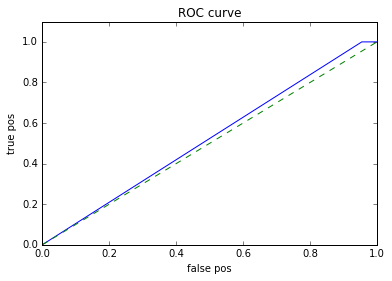

In [94]:
bclogit = LogisticRegression().fit(bcX_train,bcy_train)
bcfalsepos, bctruepos, _ = roc_curve(bcy_test, bclogit.predict(bcX_test))
plt.plot(bcfalsepos, bctruepos)
plt.ylim([0.0,1.1])
plt.plot([0,1],[0,1],'--')
plt.title('ROC curve')
plt.ylabel('true pos')
plt.xlabel('false pos')

In [93]:
print 'AUC:', auc(bcfalsepos, truepos)

AUC: 0.478084415584
